# **Stokastik Gradyan İnişi Kullanarak Sınıflandırma**

*Bu not defterinde, sınıflandırma problemleri için Stokastik Gradyan İnişi uygulamasını gösteriyoruz. Bu, eğitim veri kümesi ve özellik vektörü boyutu büyüdükçe Rastgele Orman gibi diğer bazı popüler sınıflandırıcılara kıyasla özellikle kullanışlıdır.*

*Scikit-learn'in SGDClassifier tahminci sınıfından yararlanıyoruz. Bu konuda buradan bilgi alabilirsiniz ;*

https://scikit-learn.org/stable/modules/sgd.html

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from time import time
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# **Artan eğitim seti boyutuyla çeşitli sınıflandırıcılar kullanarak eğitin**

▶ *make_classification fonksiyonunu kullanarak sentetik bir veri kümesi (yani sınıflandırma problemi) oluşturun.*

▶ *StandardScaler kullanarak özellik setini standartlaştırın.*

▶ *Test/antrenman ayrımı.*

▶ *Eğitim seti ile uyum.*

▶ *Test seti ile doğruluk puanını tahmin edin ve hesaplayın.*

# **SGDClassifier: Menteşe kaybını kullanma (destek vektör makinesi kaybı)**

In [6]:
sgd_class = SGDClassifier(alpha=0.001,loss='hinge',max_iter=100,tol=0.001,n_jobs=-1,early_stopping=True,n_iter_no_change=2)
hinge_acc=[]
hinge_time=[]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for size in [int(10**(0.2*i)) for i in range(15,31)]:
    prob=make_classification(n_samples=size,n_features=50, n_informative=45,n_classes=2,class_sep=0.75,random_state=101)
    X,y=prob
    X = scaler.fit_transform(X)
    print("Size of the problem: ",X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    t1 = time()
    sgd_class.fit(X_train,y_train)
    t2 = time()
    t_delta=round(1e3*(t2-t1),3)
    hinge_time.append(t_delta)
    print(f"Took {t_delta} milliseconds")
    acc = accuracy_score(y_test,sgd_class.predict(X_test))
    hinge_acc.append(acc)
    print("Accuracy on the test set:", round(acc,3))
    print()

Size of the problem:  (1000, 50)
Took 63.765 milliseconds
Accuracy on the test set: 0.703

Size of the problem:  (1584, 50)
Took 60.626 milliseconds
Accuracy on the test set: 0.706

Size of the problem:  (2511, 50)
Took 40.716 milliseconds
Accuracy on the test set: 0.715

Size of the problem:  (3981, 50)
Took 44.935 milliseconds
Accuracy on the test set: 0.686

Size of the problem:  (6309, 50)
Took 63.043 milliseconds
Accuracy on the test set: 0.752

Size of the problem:  (10000, 50)
Took 59.086 milliseconds
Accuracy on the test set: 0.772

Size of the problem:  (15848, 50)
Took 87.13 milliseconds
Accuracy on the test set: 0.761

Size of the problem:  (25118, 50)
Took 59.134 milliseconds
Accuracy on the test set: 0.747

Size of the problem:  (39810, 50)
Took 119.936 milliseconds
Accuracy on the test set: 0.815

Size of the problem:  (63095, 50)
Took 66.236 milliseconds
Accuracy on the test set: 0.782

Size of the problem:  (100000, 50)
Took 293.701 milliseconds
Accuracy on the test set

# **SGDClassifier: Log kaybı kullanma (lojistik regresyon)**

In [7]:
sgd_class =  SGDClassifier(alpha=0.001, loss='hinge', max_iter=100, tol=0.001, n_jobs=-1, early_stopping=True, n_iter_no_change=2)
log_acc = []
log_time = []
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for size in [int(10**(0.2*i)) for i in range(15,31)]:
  prob = make_classification(n_samples = size, n_features = 50, n_informative=45, n_classes=2, class_sep=0.75, random_state=101)
  X,y = prob
  X = scaler.fit_transform(X)
  print("Size of the problem: ", X.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  t1 = time()
  sgd_class.fit(X_train, y_train)
  t2 = time()
  t_delta = round(1e3*(t2-t1), 3)
  log_time.append(t_delta)
  print(f"Took {t_delta} milliseconds")
  acc = accuracy_score(y_test, sgd_class.predict(X_test))
  log_acc.append(acc)
  print("Accuracy on the test set:", round(acc,3))
  print()

Size of the problem:  (1000, 50)
Took 11.494 milliseconds
Accuracy on the test set: 0.76

Size of the problem:  (1584, 50)
Took 9.398 milliseconds
Accuracy on the test set: 0.693

Size of the problem:  (2511, 50)
Took 36.404 milliseconds
Accuracy on the test set: 0.706

Size of the problem:  (3981, 50)
Took 28.811 milliseconds
Accuracy on the test set: 0.659

Size of the problem:  (6309, 50)
Took 54.031 milliseconds
Accuracy on the test set: 0.751

Size of the problem:  (10000, 50)
Took 41.2 milliseconds
Accuracy on the test set: 0.752

Size of the problem:  (15848, 50)
Took 70.467 milliseconds
Accuracy on the test set: 0.783

Size of the problem:  (25118, 50)
Took 125.755 milliseconds
Accuracy on the test set: 0.786

Size of the problem:  (39810, 50)
Took 78.081 milliseconds
Accuracy on the test set: 0.806

Size of the problem:  (63095, 50)
Took 172.552 milliseconds
Accuracy on the test set: 0.79

Size of the problem:  (100000, 50)
Took 190.825 milliseconds
Accuracy on the test set: 0

# **SGDClassifier: Perceptron kayıp/algoritmasını kullanma**

In [8]:
sgd_class = SGDClassifier(alpha=0.001,loss='hinge',max_iter=100,tol=0.001,n_jobs=-1,early_stopping=True,n_iter_no_change=2)
perceptron_acc=[]
perceptron_time=[]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for size in [int(10**(0.2*i)) for i in range(15,31)]:
    prob=make_classification(n_samples=size,n_features=50, n_informative=45,n_classes=2,class_sep=0.75,random_state=101)
    X,y=prob
    X = scaler.fit_transform(X)
    print("Size of the problem: ",X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    t1 = time()
    sgd_class.fit(X_train,y_train)
    t2 = time()
    t_delta=round(1e3*(t2-t1),3)
    perceptron_time.append(t_delta)
    print(f"Took {t_delta} milliseconds")
    acc = accuracy_score(y_test,sgd_class.predict(X_test))
    perceptron_acc.append(acc)
    print("Accuracy on the test set:", round(acc,3))
    print()

Size of the problem:  (1000, 50)
Took 12.28 milliseconds
Accuracy on the test set: 0.727

Size of the problem:  (1584, 50)
Took 16.98 milliseconds
Accuracy on the test set: 0.744

Size of the problem:  (2511, 50)
Took 8.968 milliseconds
Accuracy on the test set: 0.723

Size of the problem:  (3981, 50)
Took 12.177 milliseconds
Accuracy on the test set: 0.724

Size of the problem:  (6309, 50)
Took 17.096 milliseconds
Accuracy on the test set: 0.762

Size of the problem:  (10000, 50)
Took 26.271 milliseconds
Accuracy on the test set: 0.777

Size of the problem:  (15848, 50)
Took 55.793 milliseconds
Accuracy on the test set: 0.805

Size of the problem:  (25118, 50)
Took 89.092 milliseconds
Accuracy on the test set: 0.78

Size of the problem:  (39810, 50)
Took 93.924 milliseconds
Accuracy on the test set: 0.817

Size of the problem:  (63095, 50)
Took 204.338 milliseconds
Accuracy on the test set: 0.796

Size of the problem:  (100000, 50)
Took 207.178 milliseconds
Accuracy on the test set: 0

# **Rastgele Orman sınıflandırıcı**

***Bireysel ağaçları basit ve sığ tutmak için karar ağacı sayısını (n_estimators) 20'ye ve max_depth değerini 5'e ayarladık. Hesaplama verimliliğini artırıp artırmadığını görmek için lütfen bu değerleri denemekten çekinmeyin.***


In [10]:
rf = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_jobs=-1)
rf_acc = []
rf_time = []
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for size in [int(10**(0.2*i)) for i in range(15,31)]:
  prob = make_classification(n_samples=size, n_features=50, n_informative=45, n_classes=2, class_sep=0.7, random_state=101)
  X, y = prob
  X = scaler.fit_transform(X)
  print("Size of the problem: ", X.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  t1 = time()
  rf.fit(X_train, y_train)
  t2 = time()
  t_delta = round(1e3*(t2-t1),3)
  rf_time.append(t_delta)
  print(f"Took {t_delta} milliseconds")
  acc = accuracy_score(y_test, rf.predict(X_test))
  rf_acc.append(acc)
  print("Accuracy:", round(acc, 3))
  print()

Size of the problem:  (1000, 50)
Took 191.307 milliseconds
Accuracy: 0.773

Size of the problem:  (1584, 50)
Took 202.358 milliseconds
Accuracy: 0.737

Size of the problem:  (2511, 50)
Took 592.568 milliseconds
Accuracy: 0.786

Size of the problem:  (3981, 50)
Took 221.625 milliseconds
Accuracy: 0.757

Size of the problem:  (6309, 50)
Took 361.123 milliseconds
Accuracy: 0.792

Size of the problem:  (10000, 50)
Took 703.108 milliseconds
Accuracy: 0.821

Size of the problem:  (15848, 50)
Took 1132.98 milliseconds
Accuracy: 0.779

Size of the problem:  (25118, 50)
Took 1039.825 milliseconds
Accuracy: 0.815

Size of the problem:  (39810, 50)
Took 1445.831 milliseconds
Accuracy: 0.822

Size of the problem:  (63095, 50)
Took 2360.977 milliseconds
Accuracy: 0.802

Size of the problem:  (100000, 50)
Took 3938.918 milliseconds
Accuracy: 0.829

Size of the problem:  (158489, 50)
Took 9016.878 milliseconds
Accuracy: 0.802

Size of the problem:  (251188, 50)
Took 19281.91 milliseconds
Accuracy: 0.

# **Çizim**

In [11]:
def plot_var(var,var_name):
  size = np.array([int(10**(0.2*i)) for i in range(15,31)])
  plt.figure(figsize=(8,5))
  plt.title(f"{var_name} with training set size", fontsize=18)
  plt.semilogx(size*0.7, var, marker='o', color='k', lw=3, markersize=12)
  plt.grid(True)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel("Training set size", fontsize=15)
  plt.ylabel("Training time (milliseconds)", fontsize=15)
  #plt.show()

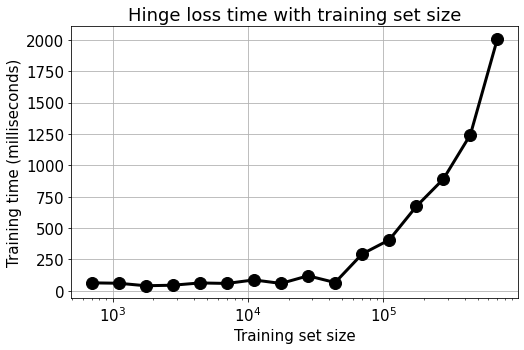

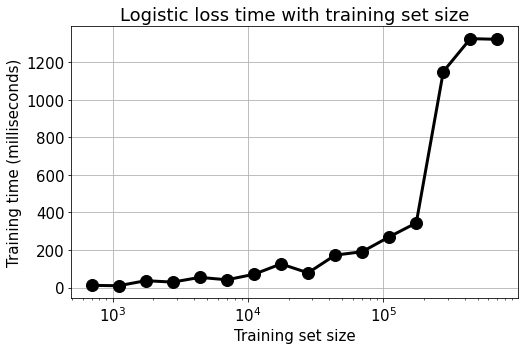

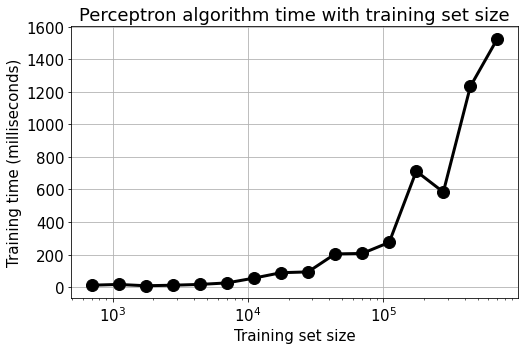

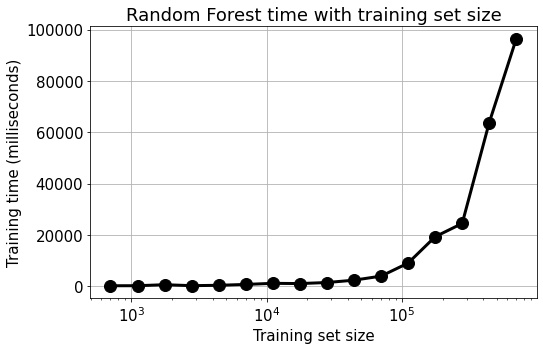

In [12]:
plot_var(hinge_time, 'Hinge loss time')
plot_var(log_time, 'Logistic loss time')
plot_var(perceptron_time, 'Perceptron algorithm time')
plot_var(rf_time, 'Random Forest time')
plt.show()

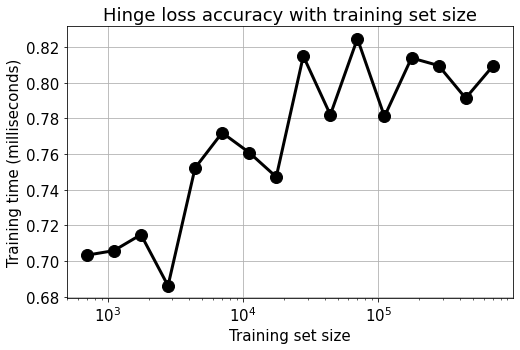

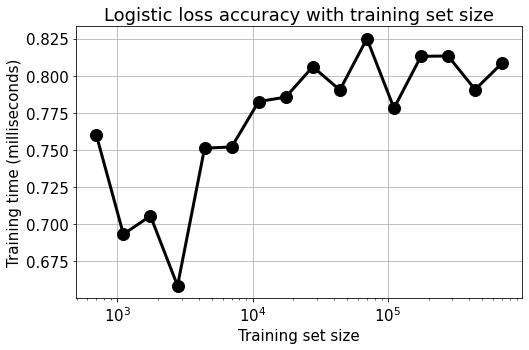

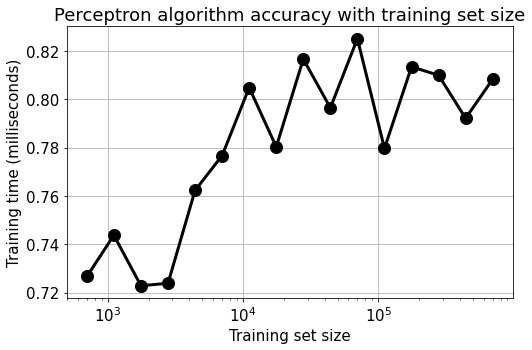

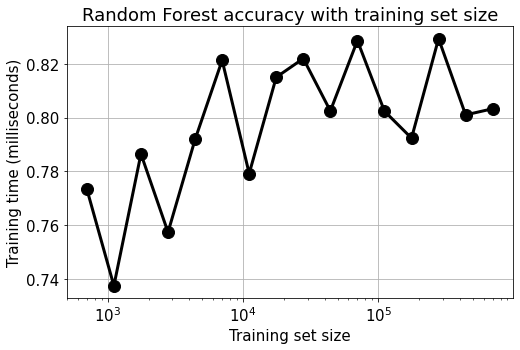

In [13]:
plot_var(hinge_acc, 'Hinge loss accuracy')
plot_var(log_acc, 'Logistic loss accuracy')
plot_var(perceptron_acc, 'Perceptron algorithm accuracy')
plot_var(rf_acc, 'Random Forest accuracy')
plt.show()

# **Gözlem**

***Benzer doğruluk seviyesine ulaşırken, SGDClassifier tahminci varyantları Rastgele Orman sınıflandırıcısına kıyasla daha hızlı eğitim süresi göstermektedir. Eğitim seti boyutunun alt sınırında (<100.000) fark o kadar önemli değildir. Ancak fark, daha büyük eğitim seti boyutu için belirgin hale gelir.***